In [1]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file

mem = Memory("./mycache")
@mem.cache
def get_data():
    data = load_svmlight_file("housing.txt")
    return data[0], data[1]

X, y = get_data()
train_X = X[0:506]
train_y = y[0:506]

________________________________________________________________________________
[Memory] Calling __main__-D%3A-jupyterWork-__ipython-input__.get_data...
get_data()
_________________________________________________________get_data - 0.0s, 0.0min


In [3]:
from numpy import *
import  numpy as np
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.33, random_state=42)
Xt=X_train.toarray()
Xt=mat(Xt)
Xv=X_validation.toarray()
Xv=mat(Xv)
Yt=mat(y_train).T
Yv=mat(y_validation).T

#print(Xt.shape)
#print(y_train.shape)
#print(y_train)
w=[np.float(10)for i in range(14)]
w=mat(w).T

one=[np.float64(1) for x in range(339)]
one2=[np.float64(1) for x in range(167)]


nita=0.0001
Xtt = np.column_stack((Xt,one))#为train集矩阵最后面加一列1
Xvv = np.column_stack((Xv,one2))#为Validation集最后面加一列1
print(Yt.shape)

(339, 1)


In [4]:
time=100
loss=[np.float(10)for i in range(0,time)]
lossV=[np.float(10)for i in range(0,time)]
for i in range(0,time):
    w1=2*(Xtt.T)*(Xtt*w-Yt)
    w=w-nita*w1
    L=np.float(((Xtt*w-Yt).T)*(Xtt*w-Yt))
    LV=np.float(((Xvv*w-Yv).T)*(Xvv*w-Yv))
    loss[i]=L
    lossV[i]=LV
    #lossV[i]=LV


print(loss[time-1])

15330.853530885723


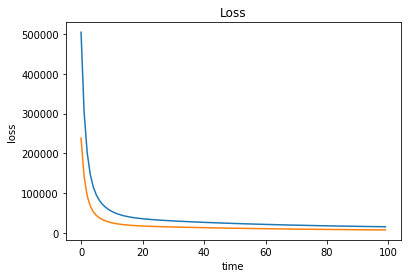

In [5]:
x_data=np.arange(0,time,1)
y_data=loss


y_data2=lossV
import matplotlib.pyplot as plt
plt.plot(x_data,y_data)
plt.plot(x_data,y_data2)
plt.title(u"Loss")
plt.legend()
plt.xlabel(u"time")
plt.ylabel(u"loss")
plt.show()
#红色为验证集，蓝色为训练集